In [77]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, numpy_utils, stats_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import scipy.stats
import cmocean

from plotting import load_fits, plot_utils

In [78]:

subject =1;
which_prf_grid = 5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)

save_name_groups = os.path.join(default_paths.stim_labels_root,'All_concat_labelgroupnames.npy')
groups = np.load(save_name_groups, allow_pickle=True).item()
discrim_type_list = groups['discrim_type_list']
n_discrim_types = len(discrim_type_list)

path_to_load = default_paths.pyramid_texture_feat_path  
path_to_load = os.path.join(path_to_load, 'feature_stats')

feature_type='pyramid_texture_ll'
fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn4 = os.path.join(path_to_load, 'S%d_%s_semantic_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn5 = os.path.join(path_to_load, 'S%d_%s_semantic_discrim_tstat_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn6 = os.path.join(path_to_load, 'S%d_%s_nsamp_grid%d.npy'%(subject, feature_type, which_prf_grid))

print('loading from %s and %s and %s'%(fn1, fn2, fn3))
print('loading from %s and %s and %s'%(fn4, fn5, fn6))
mean_result = np.load(fn1,allow_pickle=True)
var_result = np.load(fn2,allow_pickle=True)
covar_ll_result = np.load(fn3,allow_pickle=True)
corr_result = np.load(fn4,allow_pickle=True)*(-1)
discrim_result = np.load(fn5,allow_pickle=True)*(-1)
nsamp_ll_result = np.load(fn6,allow_pickle=True)

feature_type='pyramid_texture_hl_pca'
fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn4 = os.path.join(path_to_load, 'S%d_%s_semantic_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn5 = os.path.join(path_to_load, 'S%d_%s_semantic_discrim_tstat_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn6 = os.path.join(path_to_load, 'S%d_%s_nsamp_grid%d.npy'%(subject, feature_type, which_prf_grid))

print('loading from %s and %s and %s'%(fn1, fn2, fn3))
print('loading from %s and %s and %s'%(fn4, fn5, fn6))
mean_result = np.concatenate([mean_result, np.load(fn1,allow_pickle=True)], axis=0)
var_result = np.concatenate([var_result, np.load(fn2,allow_pickle=True)], axis=0);
covar_hl_result = np.load(fn3,allow_pickle=True)
corr_result = np.concatenate([corr_result, np.load(fn4,allow_pickle=True)*(-1)], axis=0)
discrim_result = np.concatenate([discrim_result, np.load(fn5,allow_pickle=True)*(-1)], axis=0)
nsamp_hl_result = np.load(fn6,allow_pickle=True)
assert np.all(nsamp_ll_result==nsamp_hl_result)

n_sem_axes = discrim_result.shape[2]

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]
loading from /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_ll_mean_grid5.npy and /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_ll_var_grid5.npy and /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_ll_covar_grid5.npy
loading from /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_ll_semantic_corrs_grid5.npy and /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_ll_semantic_discrim_tstat_grid5.npy and /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_ll_nsamp_grid5.npy
loading from /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_hl_pca_mean_grid5.npy and /user_data/mmhender/features/pyramid_texture/feature_stats/S1_pyramid_texture_hl_pca_var_grid5.npy and /us

In [3]:
discrim_result.shape

(641, 1456, 54)

In [79]:
# Gather information about the feature channels
fn2save = os.path.join(default_paths.pyramid_texture_feat_path,'pyr_pars.csv')
pyr_df = pd.read_csv(fn2save, index_col=0)
pyr_df

lowpass cutoff (cyc/pix)  highpass cutoff (cyc/pix)  \
0                  0.125000                     0.5000   
1                  0.062500                     0.2500   
2                  0.031250                     0.1250   
3                  0.015625                     0.0625   

   approx center (cyc/pix)  lowpass cutoff (cyc/deg)  \
0                  0.25000                  3.571429   
1                  0.12500                  1.785714   
2                  0.06250                  0.892857   
3                  0.03125                  0.446429   

   highpass cutoff (cyc/deg)  approx center (cyc/deg)  
0                  14.285714                 7.142857  
1                   7.142857                 3.571429  
2                   3.571429                 1.785714  
3                   1.785714                 0.892857

In [80]:
n_ori = 4; n_sf=4;

ori_unique = np.array([0,45,90,135])
orient_inds = np.tile(np.arange(n_ori), [n_sf,])
ori_deg = ori_unique[orient_inds]

sf_unique = np.flip(np.array(pyr_df['approx center (cyc/deg)']))
sf_inds = np.repeat(np.arange(n_sf), n_ori)
sf_cyc_per_deg = sf_unique[sf_inds]

print(ori_deg)
print(sf_cyc_per_deg.round(2))

[  0  45  90 135   0  45  90 135   0  45  90 135   0  45  90 135]
[0.89 0.89 0.89 0.89 1.79 1.79 1.79 1.79 3.57 3.57 3.57 3.57 7.14 7.14
 7.14 7.14]


In [81]:
np.reshape(ori_deg, [n_sf, n_ori])

array([[  0,  45,  90, 135],
       [  0,  45,  90, 135],
       [  0,  45,  90, 135],
       [  0,  45,  90, 135]])

In [82]:
# initialize the pyramid texture feature extractor to get diff feature set labels
from feature_extraction import texture_statistics_pyramid, fwrf_features
feature_types_all = texture_statistics_pyramid.feature_types_all
feature_type_dims_all = texture_statistics_pyramid.feature_type_dims_all
feat_loader = fwrf_features.fwrf_feature_loader(subject=subject,\
                which_prf_grid=which_prf_grid, \
                feature_type='pyramid_texture',\
                n_ori=4, n_sf=4,\
                include_ll=True, include_hl=True,\
                use_pca_feats_hl = True,\
                group_all_hl_feats=False, prf_batch_size=1)     
n_feature_types = len(feature_types_all)

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


In [83]:
# summary statistics for each individual type of pyramid features

mean_corr_each_type = np.zeros((n_feature_types,  n_sem_axes,  n_prfs))
mean_discrim_each_type = np.zeros((n_feature_types,  n_sem_axes, n_prfs))
max_corr_each_type = np.zeros((n_feature_types,  n_sem_axes,  n_prfs))
max_discrim_each_type = np.zeros((n_feature_types,  n_sem_axes, n_prfs))

for fi, feature_type_name in enumerate(feature_types_all):
    inds = feat_loader.feature_column_labels==fi
    for pi in range(n_prfs):  
        mvals = mean_result[inds,pi]
        cvals = np.abs(corr_result[inds,pi,:])        
        dvals = np.abs(discrim_result[inds,pi,:])        
        zero_inds = np.where(mvals==0)[0]
        if len(zero_inds)==0:
            n_feat_to_use = feature_type_dims_all[fi]
        else:
            n_feat_to_use = zero_inds[0]                   
        mean_corr_each_type[fi,:,pi] = np.mean(cvals[0:n_feat_to_use,:], axis=0)                          
        mean_discrim_each_type[fi,:,pi] = np.mean(dvals[0:n_feat_to_use,:], axis=0)                          
        max_corr_each_type[fi,:,pi] = np.max(cvals[0:n_feat_to_use,:], axis=0)                          
        max_discrim_each_type[fi,:,pi] = np.max(dvals[0:n_feat_to_use,:], axis=0)                          

min_thresh = 10
inds_exclude = np.any(nsamp_ll_result[:,:,:]<min_thresh, axis=2).T
mean_corr_each_type[:,inds_exclude] = np.nan
mean_discrim_each_type[:,inds_exclude] = np.nan
max_corr_each_type[:,inds_exclude] = np.nan
max_discrim_each_type[:,inds_exclude] = np.nan

In [140]:
max_discrim_each_type.shape

(14, 54, 1456)

In [84]:
# make some groups (averaging over all superord or basic level discrims)

inds2group = [[0], [1], [2], np.arange(3,15), np.arange(26,42), np.arange(15,26), np.arange(42,54)]
group_names = [discrim_type_list[ii] for ii in [0,1,2]] + \
                ['things-superord','stuff-superord' ,'things-basic', 'stuff-basic']

max_discrim_grouped = np.zeros((len(feature_types_all), len(inds2group), n_prfs))

for gg, inds in enumerate(inds2group):
    max_discrim_grouped[:,gg,:] = np.nanmean(max_discrim_each_type[:,inds,:], axis=1)
    
    print(group_names[gg])
    print(np.array(discrim_type_list)[inds])

indoor_outdoor
['indoor_outdoor']
natural_humanmade
['natural_humanmade']
animacy
['animacy']
things-superord
['accessory' 'animal' 'appliance' 'electronic' 'food' 'furniture' 'indoor'
 'kitchen' 'outdoor' 'person' 'sports' 'vehicle']
stuff-superord
['building' 'ceiling' 'floor' 'food-stuff' 'furniture-stuff' 'ground'
 'other' 'plant' 'raw-material' 'sky' 'solid' 'structural' 'textile'
 'wall' 'water' 'window']
things-basic
['within_accessory' 'within_animal' 'within_appliance' 'within_electronic'
 'within_food' 'within_furniture' 'within_indoor' 'within_kitchen'
 'within_outdoor' 'within_sports' 'within_vehicle']
stuff-basic
['within_building' 'within_floor' 'within_food-stuff'
 'within_furniture-stuff' 'within_ground' 'within_plant'
 'within_raw-material' 'within_solid' 'within_structural' 'within_textile'
 'within_wall' 'within_water']


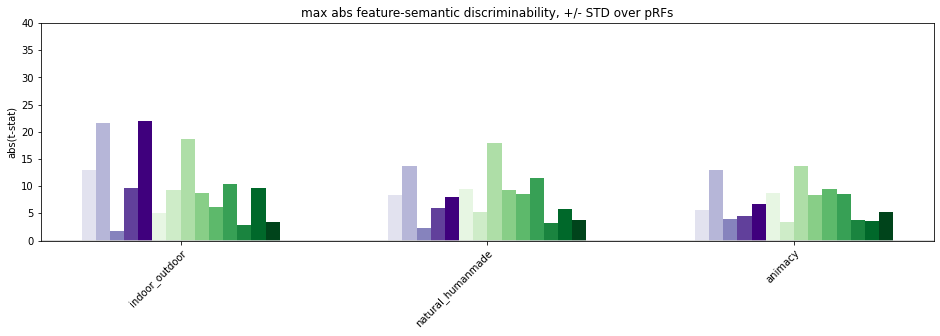

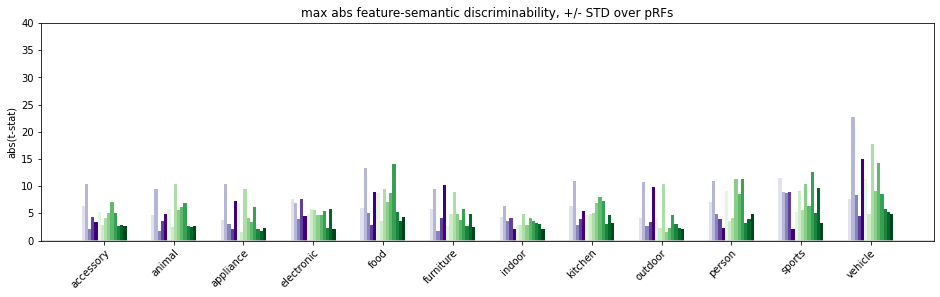

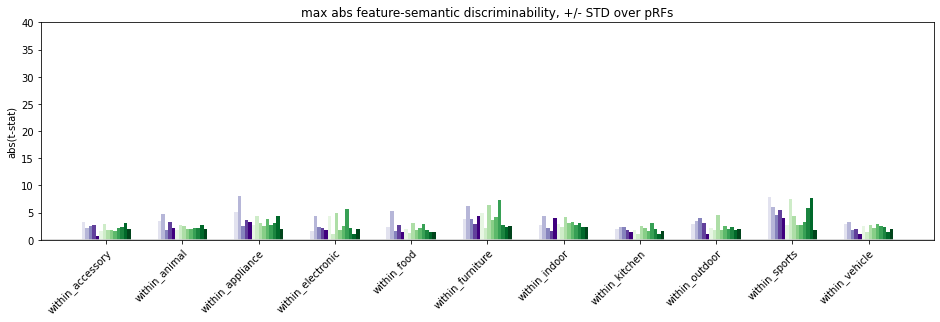

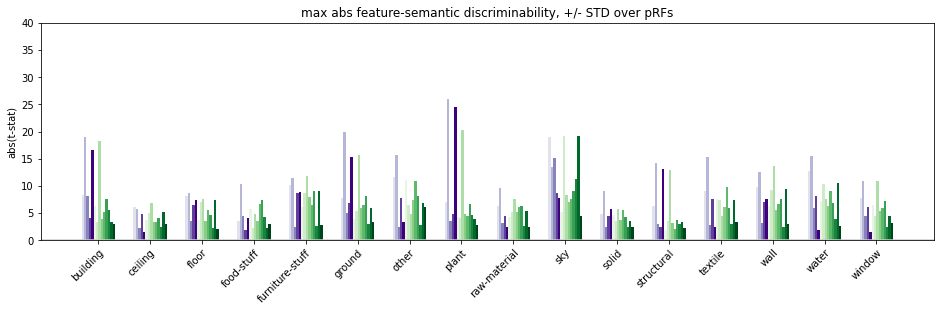

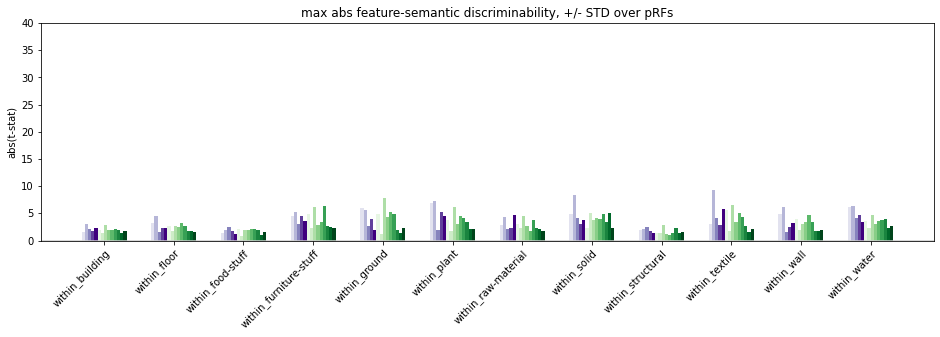

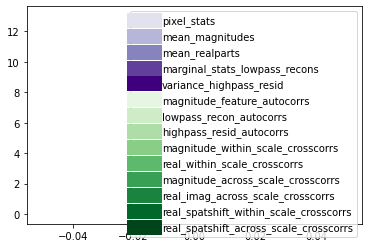

In [85]:
inds_list = [np.arange(0,3), np.arange(3,15), np.arange(15,26), np.arange(26,42), np.arange(42,54)]
 
# feature_colors = cm.tab20(np.linspace(0,1,n_feature_types))
feature_colors = np.concatenate([cm.Purples(np.linspace(0,1,6))[1:,:], \
                                 cm.Greens(np.linspace(0,1,10))[1:,:]], axis=0)
for ii, inds in enumerate(inds_list):

    mean_vals = np.nanmean(max_discrim_each_type[:,inds,:], axis=2).T
    std_vals =  np.nanstd(max_discrim_each_type[:,inds,:], axis=2).T
    
    title = 'max abs feature-semantic discriminability, +/- STD over pRFs'

    if ii==len(inds_list)-1:
        legend_separate=True
    else:
        legend_separate=False
        
    plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=None, colors=feature_colors, space=0.20, \
                    xticklabels=np.array(discrim_type_list)[inds], ylabel='abs(t-stat)', \
                    ylim=[0,40], title=title, horizontal_line_pos=0,\
                    legend_labels=feature_types_all, \
                    legend_overlaid=False, legend_separate=legend_separate, \
                    fig_size=(16,4))
    

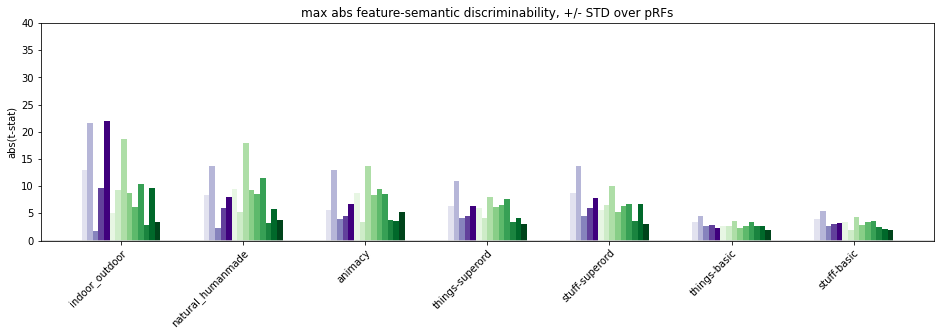

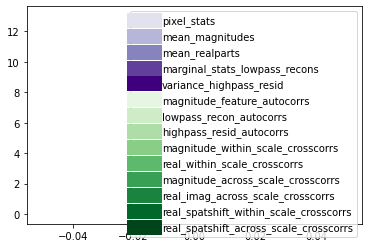

In [87]:
 
# feature_colors = cm.tab20(np.linspace(0,1,n_feature_types))
feature_colors = np.concatenate([cm.Purples(np.linspace(0,1,6))[1:,:], \
                                 cm.Greens(np.linspace(0,1,10))[1:,:]], axis=0)

mean_vals = np.nanmean(max_discrim_grouped, axis=2).T
std_vals =  np.nanstd(max_discrim_grouped, axis=2).T

title = 'max abs feature-semantic discriminability, +/- STD over pRFs'

legend_separate=True

plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=None, colors=feature_colors, space=0.20, \
                xticklabels=group_names, ylabel='abs(t-stat)', \
                ylim=[0,40], title=title, horizontal_line_pos=0,\
                legend_labels=feature_types_all, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))
    

In [117]:
for dd in range(3):
    
    d2sort = np.mean(max_discrim_each_type[:,dd,:], axis=1)
    top_feats = np.flip(np.argsort(d2sort))
    print(top_feats[0:3])
    print(np.array(feature_types_all)[top_feats[0:3]])

[4 1 7]
['variance_highpass_resid' 'mean_magnitudes' 'highpass_resid_autocorrs']
[ 7  1 10]
['highpass_resid_autocorrs' 'mean_magnitudes'
 'magnitude_across_scale_crosscorrs']
[7 1 9]
['highpass_resid_autocorrs' 'mean_magnitudes'
 'real_within_scale_crosscorrs']


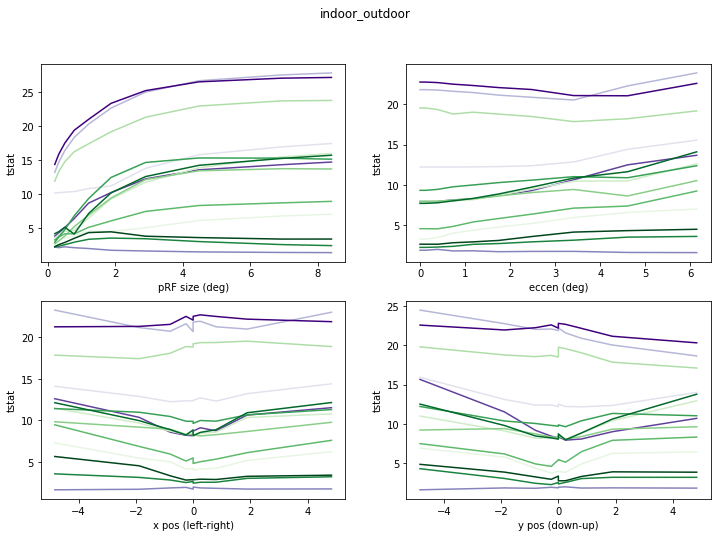

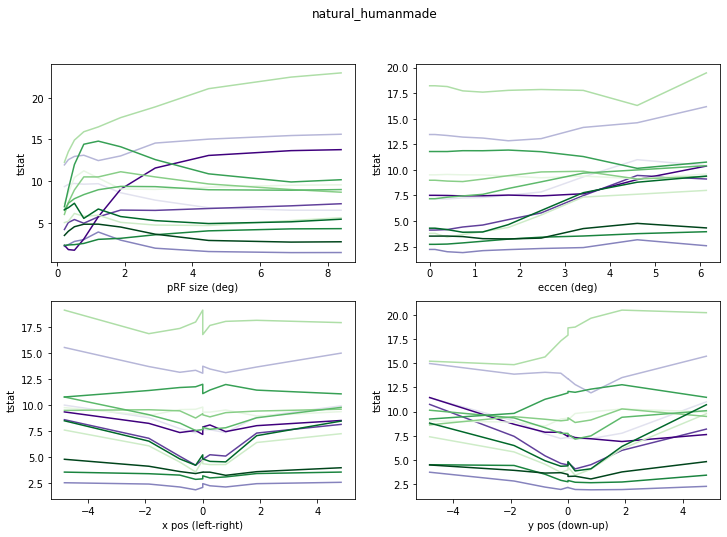

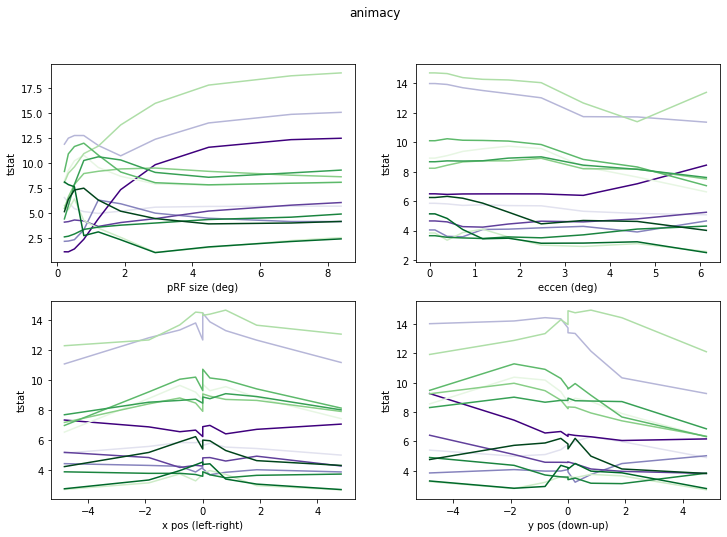

In [123]:
# plotting discrim as a function of eccen

n_bins = 10;
linear_bins = False
feature_colors = np.concatenate([cm.Purples(np.linspace(0,1,6))[1:,:], \
                                 cm.Greens(np.linspace(0,1,10))[1:,:]], axis=0)
    
for dd in range(3):
    
    discrim_type = discrim_type_list[dd]
    
    d2sort = np.mean(max_discrim_each_type[:,dd,:], axis=1)
    top_feats = np.flip(np.argsort(d2sort))[0:2]
#     fi2plot = top_feats
    fi2plot = np.arange(n_feature_types)
    
    plt.figure(figsize=(12,8));
    
    for fi in fi2plot:
        feature_type = feature_types_all[fi]
#     for fi, feature_type in enumerate(feature_types_all):

        tstat_vals = max_discrim_each_type[fi,dd,:]

        plt.subplot(2,2,1)
        x_vals = models[:,2]*8.4
        xbinned, ybinned = numpy_utils.bin_ydata_by_xdata(x_vals, tstat_vals, \
                                                          n_bins=n_bins, linear_bins=linear_bins)
        plt.plot(xbinned, ybinned, '-', color=feature_colors[fi,:])
        plt.xlabel('pRF size (deg)')
        plt.ylabel('tstat')

        plt.subplot(2,2,2)
        x_vals = np.sqrt(models[:,0]**2+models[:,1]**2)*8.4
        xbinned, ybinned = numpy_utils.bin_ydata_by_xdata(x_vals, tstat_vals, \
                                                          n_bins=n_bins, linear_bins=linear_bins)
        plt.plot(xbinned, ybinned, '-', color=feature_colors[fi,:])
        plt.xlabel('eccen (deg)')
        plt.ylabel('tstat')

        plt.subplot(2,2,3)
        x_vals = models[:,0]*8.4
        xbinned, ybinned = numpy_utils.bin_ydata_by_xdata(x_vals, tstat_vals, \
                                                          n_bins=n_bins, linear_bins=linear_bins)
        plt.plot(xbinned, ybinned, '-', color=feature_colors[fi,:])
        plt.xlabel('x pos (left-right)')
        plt.ylabel('tstat')

        plt.subplot(2,2,4)
        x_vals = models[:,1]*8.4
        xbinned, ybinned = numpy_utils.bin_ydata_by_xdata(x_vals, tstat_vals, \
                                                          n_bins=n_bins, linear_bins=linear_bins)
        plt.plot(xbinned, ybinned, '-', color=feature_colors[fi,:])
        plt.xlabel('y pos (down-up)')
        plt.ylabel('tstat')

        plt.suptitle('%s'%(discrim_type))

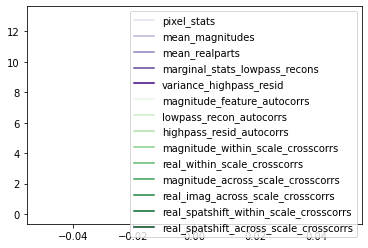

In [121]:
plt.figure();
for fi, feature_type in enumerate(feature_types_all):
    plt.plot(0,fi, '-', color = feature_colors[fi,:])
    
plt.legend(feature_types_all)

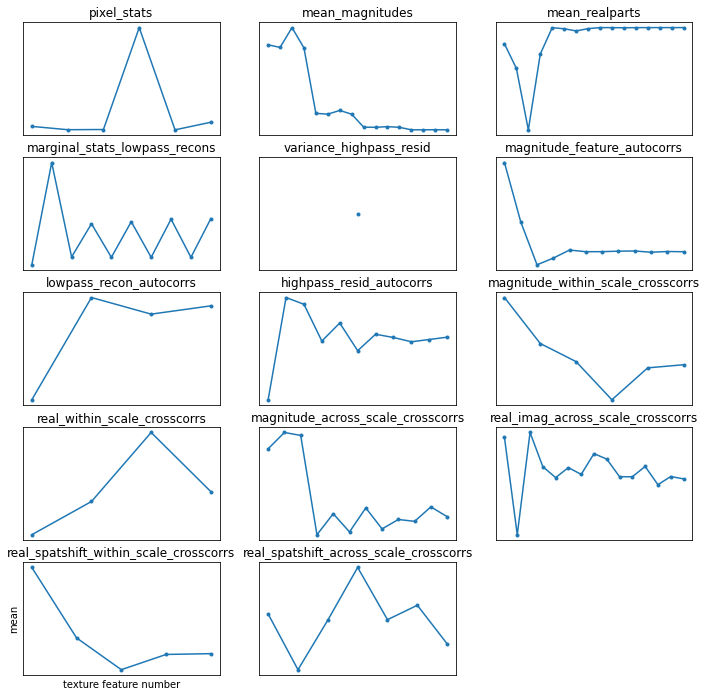

In [86]:
# Plot mean each feature channel
# Averaged across pRFs

plt.figure(figsize=(12,12));

for fi, feature_type_name in enumerate(feature_types_all):
    plt.subplot(5,3,(fi+1))
    
    vals2plot = mean_result[feat_loader.feature_column_labels==fi,:]
    zero_inds = np.where(np.all(vals2plot==0, axis=1))[0]
    if len(zero_inds)==0:
        n_feat_to_use = feature_type_dims_all[fi]
    else:
        n_feat_to_use = zero_inds[0] 
   
    mvals = np.mean(vals2plot[0:n_feat_to_use,:], axis=1)
#     if len(mvals)>1
    plt.plot(mvals,'.-')
   
    plt.title(feature_type_name)
    
    
    if fi==12:
        plt.xlabel('texture feature number');
        plt.ylabel('mean');
    
    plt.xticks([])
    plt.yticks([])

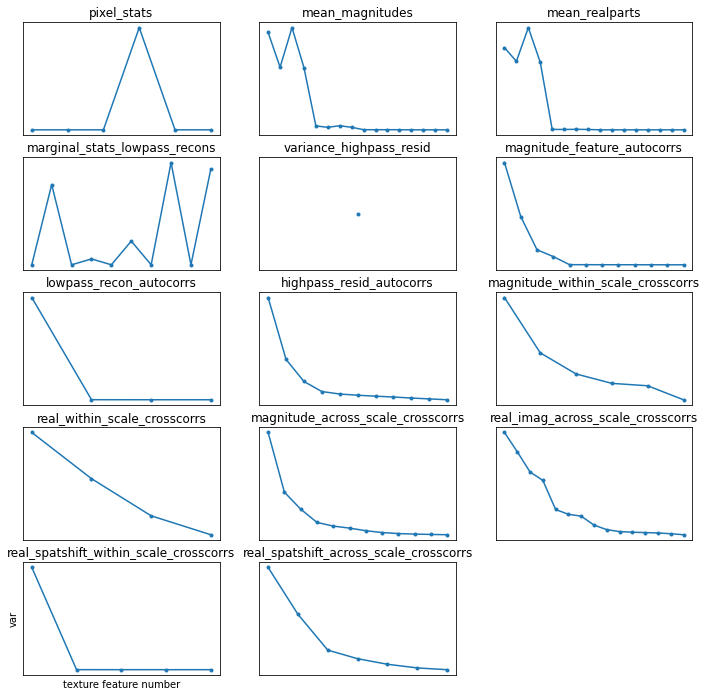

In [88]:
# Plot variance each feature channel
# Averaged across pRFs

plt.figure(figsize=(12,12));

for fi, feature_type_name in enumerate(feature_types_all):
    plt.subplot(5,3,(fi+1))
    
    vals2plot = var_result[feat_loader.feature_column_labels==fi,:]
    zero_inds = np.where(np.all(vals2plot==0, axis=1))[0]
    if len(zero_inds)==0:
        n_feat_to_use = feature_type_dims_all[fi]
    else:
        n_feat_to_use = zero_inds[0] 
   
    vvals = np.mean(vals2plot[0:n_feat_to_use,:], axis=1)
#     if len(mvals)>1
    plt.plot(vvals,'.-')
   
    plt.title(feature_type_name)
    
    
    if fi==12:
        plt.xlabel('texture feature number');
        plt.ylabel('var');
    
    plt.xticks([])
    plt.yticks([])

In [90]:
# Gather actual fit parameters for the texture encoding model
subject = 1
fitting_type = 'texture_pyramid_ridge_4ori_4sf_pca_HL'
out = load_fits.load_fit_results(subject, fitting_type, n_from_end=0,verbose=True);

feature_weights = out['best_params'][1][:,:,0]
feature_corrs = out['corr_each_feature']
n_voxels = feature_weights.shape[0]

w = []; corr=[]
for fi, feature_name in enumerate(feature_types_all):
    inds = feat_loader.feature_column_labels==fi;
    w.append(feature_weights[:,inds])
    corr.append(feature_corrs[:,inds])

loading from /user_data/mmhender/imStat/model_fits/S01/texture_pyramid_ridge_4ori_4sf_pca_HL/Feb-05-2022_2057_18/all_fit_params.npy

dict_keys(['subject', 'volume_space', 'fitting_types', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'saved_prfs_fn', 'best_layer_each_voxel', 'saved_best_layer_fn', 'voxel_subset_is_done_trn', 'voxel_subset_is_done_val', 'corr_each_feature', 'sem_discrim_each_axis', 'sem_corr_each_axis', 'discrim_type_list', 'n_sem_samp_each_axis', 'use_pca_pyr_feats_hl', 'pyramid_feature_info', 'group_all_hl_feats'])


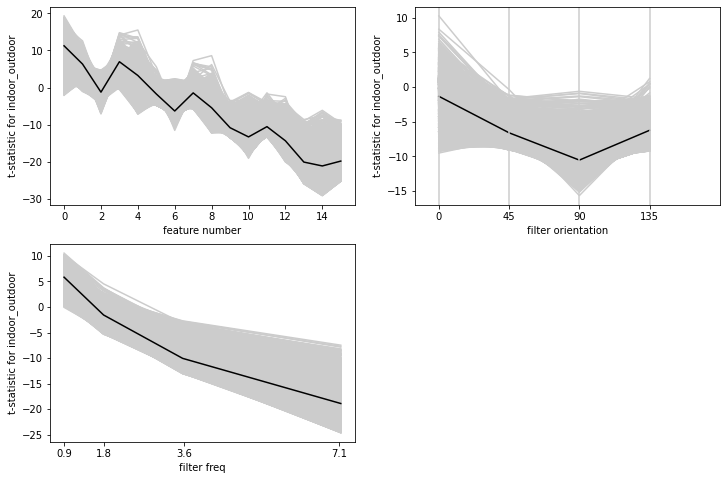

In [91]:
# Plot t-statistic of feature channels with semantic features
# Gray lines are individual pRFs

fi = 1;

discrim_result_use = discrim_result[feat_loader.feature_column_labels==fi,:,:]

dd = 0;

plt.figure(figsize=(12,8));

plt.subplot(2,2,1)
plt.plot(discrim_result_use[:,:,dd], color = [0.8, 0.8, 0.8])
plt.plot(np.mean(discrim_result_use[:,:,dd], axis=1), color='k')
plt.xlabel('feature number');
plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);

plt.subplot(2,2,2)
mean_each_orient = np.mean(np.reshape(discrim_result_use[:,:,dd],[n_sf, n_ori, n_prfs]), axis=0);
plt.plot(ori_unique, mean_each_orient, color=[0.8, 0.8, 0.8])
plt.plot(ori_unique, np.mean(mean_each_orient, axis=1), color='k')
plt.xlabel('filter orientation');
plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
plt.xlim([-15, 180])
plt.xticks(ori_unique)
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])
    
plt.subplot(2,2,3)
mean_each_freq = np.mean(np.reshape(discrim_result_use[:,:,dd],[n_sf, n_ori, n_prfs]), axis=1);
plt.plot(sf_unique, mean_each_freq, color=[0.8, 0.8, 0.8])
plt.plot(sf_unique, np.mean(mean_each_freq, axis=1), color='k')
plt.xlabel('filter freq');
plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
plt.xticks(sf_unique.round(1));
 
 

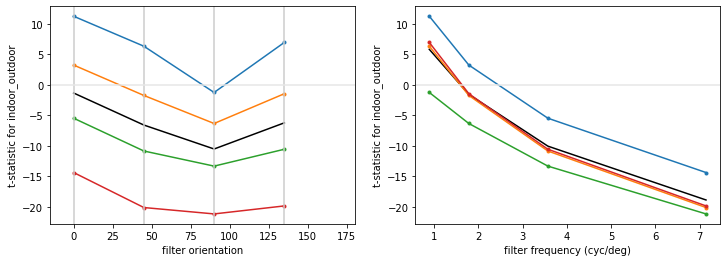

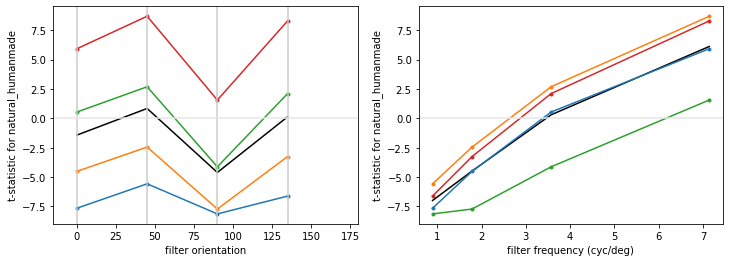

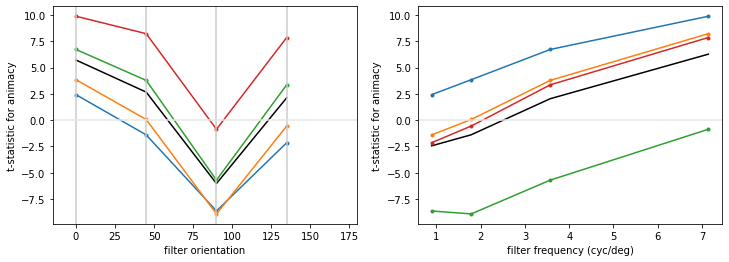

In [92]:
# Averaged over pRFs but separating diff frequencies/orients

fi = 1;

discrim_result_use = discrim_result[feat_loader.feature_column_labels==fi,:,:]

n_prfs = discrim_result[:,:,dd].shape[1]

# for dd in range(len(discrim_type_list)):
for dd in range(3):

    plt.figure(figsize=(12,4));
    plt.subplot(1,2,1)
    mean_each_orient = np.mean(np.mean(np.reshape(discrim_result_use[:,:,dd], [n_sf, n_ori, n_prfs], \
                                                  ), axis=2), axis=0);
    plt.plot(ori_unique, mean_each_orient,color='k')
    for sf in range(n_sf):
        plt.plot(ori_unique, np.mean(discrim_result_use[sf_inds==sf,:,dd], axis=1),'.-')
    plt.xlabel('filter orientation');
    plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.9, 0.9, 0.9])

    plt.subplot(1,2,2)
    mean_each_sf = np.mean(np.reshape(np.mean(discrim_result_use[:,:,dd], axis=1), [n_sf, n_ori]), axis=1);
    plt.plot(sf_unique, mean_each_sf,color='k')
    for oo in range(n_ori):
        plt.plot(sf_unique, np.mean(discrim_result_use[orient_inds==oo,:,dd], axis=1),'.-')
    plt.xlabel('filter frequency (cyc/deg)');
    plt.ylabel('t-statistic for %s'%discrim_type_list[dd]);
    # plt.xlim([-15, 180])
    plt.axhline(0, color=[0.9, 0.9, 0.9]);

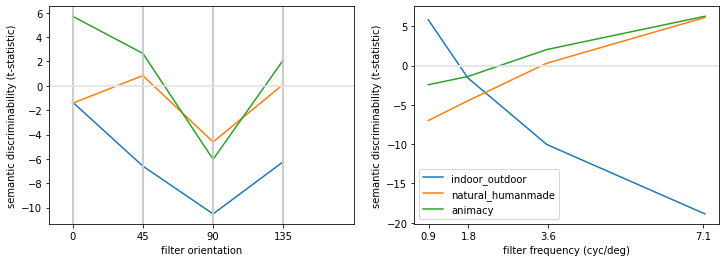

In [93]:
# Average over pRFs, overlaying different semantic content

fi = 1;

discrim_result_use = discrim_result[feat_loader.feature_column_labels==fi,:,:]

plt.figure(figsize=(12,4));
lh = []

for dd in range(3):
    
    plt.subplot(1,2,1)
    mean_each_orient = np.mean(np.reshape(np.mean(discrim_result_use[:,:,dd], axis=1), [n_sf, n_ori]), axis=0);
    plt.plot(ori_unique, mean_each_orient)   
    plt.xlabel('filter orientation');
    plt.xlim([-15, 180])
    for ii in np.arange(0,180,45):
        plt.axvline(ii, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.9, 0.9, 0.9])
    plt.ylabel('semantic discriminability (t-statistic)')
    plt.xticks(ori_unique)
    
    ax = plt.subplot(1,2,2)
    mean_each_sf = np.mean(np.reshape(np.mean(discrim_result_use[:,:,dd], axis=1), [n_sf, n_ori]), axis=1);
    l, = ax.plot(sf_unique, mean_each_sf)
    lh.append(l)
    plt.xlabel('filter frequency (cyc/deg)');
    plt.axhline(0, color=[0.9, 0.9, 0.9]);
    plt.ylabel('semantic discriminability (t-statistic)')
    plt.xticks(sf_unique.round(1));
    
plt.legend(lh, discrim_type_list)

[1.2900446653366089, 9.880619049072266]
[9.295008931076154e-05, 2.918367385864258]


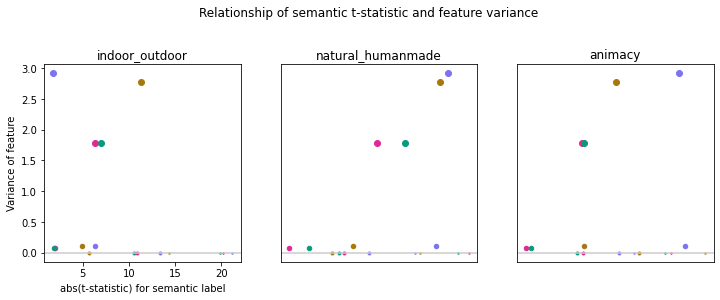

In [94]:
# Plot relationship between feature channels' variance, and semantic informativeness

fi = 1;

discrim_result_use = discrim_result[feat_loader.feature_column_labels==fi,:,:]
var_result_use = var_result[feat_loader.feature_column_labels==fi,:]

n_color_steps = n_ori
# colors = cm.plasma(np.linspace(0,1,n_color_steps))
colors = cmocean.cm.phase(np.linspace(0,1,n_color_steps+1))[0:4,:]

n_size_steps = n_sf
sizes = np.linspace(12,3,n_sf)
# sizes = np.linspace(12,12,n_sf)

# dorder = [0,2,3,4,1,5]

plt.figure(figsize=(12,8))
npx = 2
npy = 3

pi=0

for dd in range(3):

    xlims = [-0.08, 0.28]
    ylims = [0.00013, 0.0013]
#     xlims = [np.min(np.mean(discrim_result[:,:,dd], axis=1))-0.02, \
#              np.max(np.mean(discrim_result[:,:,dd], axis=1))+0.02]
#     ylims = [np.min(np.mean(var_result, axis=1))-0.000002, \
#              np.max(np.mean(var_result, axis=1))+0.000002]

    running_xmin=100; running_ymin=100;
    running_xmax=-100; running_ymax=-100;
    pi+=1
    plt.subplot(npx,npy,pi)
 
    xvals = np.mean(np.abs(discrim_result_use[:,:,dd]), axis=1)
    yvals = np.mean(var_result_use, axis=1)

    running_xmin = np.min([running_xmin, np.min(xvals)])
    running_ymin = np.min([running_ymin, np.min(yvals)])
    running_xmax = np.max([running_xmax, np.max(xvals)])
    running_ymax = np.max([running_ymax, np.max(yvals)])

    for oo in range(n_ori):
#                     inds = np.where(orient_inds==oo)[0]
#                     plt.plot(np.mean(xvals[inds]), np.mean(yvals[inds]), '.',\
#                              color=colors[oo,:], markersize=sizes[sf])
        for sf in range(n_sf):
            inds = np.where((orient_inds==oo) & (sf_inds==sf))[0]
            plt.plot(xvals[inds], yvals[inds],'.',color=colors[oo,:], markersize=sizes[sf])
                
    if pi==1:
        plt.xlabel('abs(t-statistic) for semantic label')
        plt.ylabel('Variance of feature')
    else:
        plt.xticks([])
        plt.yticks([])

    plt.axhline(0,color=[0.8, 0.8, 0.8])
    plt.title(discrim_type_list[dd])

#     plt.xlim(xlims)
#     plt.ylim(ylims)
    
plt.suptitle('Relationship of semantic t-statistic and feature variance');
    
print([running_xmin, running_xmax])
print([running_ymin, running_ymax])


In [95]:
sizes

array([12.,  9.,  6.,  3.])

[1.2900446653366089, 9.880619049072266]
[0.017273670062422752, 3.352092742919922]


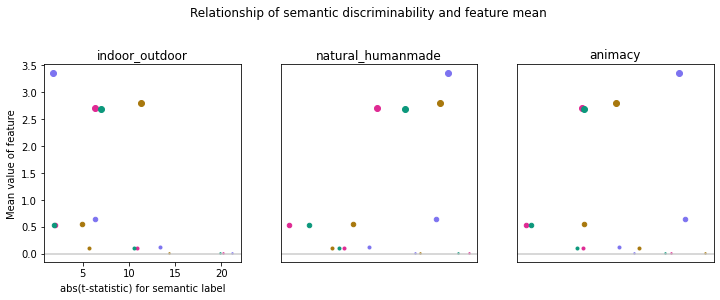

In [96]:
# Plot relationship between feature channels' mean, and semantic informativeness

fi = 1;

discrim_result_use = discrim_result[feat_loader.feature_column_labels==fi,:,:]
mean_result_use = mean_result[feat_loader.feature_column_labels==fi,:]


n_color_steps = n_ori
# colors = cm.plasma(np.linspace(0,1,n_color_steps))
colors = cmocean.cm.phase(np.linspace(0,1,n_color_steps+1))[0:4,:]

n_size_steps = n_sf
sizes = np.linspace(12,3,n_sf)
# sizes = np.linspace(12,12,n_sf)

# dorder = [0,2,3,4,1,5]

plt.figure(figsize=(12,8))
npx = 2
npy = 3
# npy = int(len(dorder)/npx)

pi=0

for dd in range(3):

    xlims = [-0.08, 0.28]
    ylims = [0.037, 0.14]
#     xlims = [np.min(np.mean(discrim_result[:,:,dd], axis=1))-0.02, \
#              np.max(np.mean(discrim_result[:,:,dd], axis=1))+0.02]
#     ylims = [np.min(np.mean(var_result, axis=1))-0.000002, \
#              np.max(np.mean(var_result, axis=1))+0.000002]

    running_xmin=100; running_ymin=100;
    running_xmax=-100; running_ymax=-100;
    pi+=1
    plt.subplot(npx,npy,pi)
 
    xvals = np.mean(np.abs(discrim_result_use[:,:,dd]), axis=1)
    yvals = np.mean(mean_result_use, axis=1)

    running_xmin = np.min([running_xmin, np.min(xvals)])
    running_ymin = np.min([running_ymin, np.min(yvals)])
    running_xmax = np.max([running_xmax, np.max(xvals)])
    running_ymax = np.max([running_ymax, np.max(yvals)])

    for oo in range(n_ori):
#                     inds = np.where(orient_inds==oo)[0]
#                     plt.plot(np.mean(xvals[inds]), np.mean(yvals[inds]), '.',\
#                              color=colors[oo,:], markersize=sizes[sf])
        for sf in range(n_sf):
            inds = np.where((orient_inds==oo) & (sf_inds==sf))[0]
            plt.plot(xvals[inds], yvals[inds],'.',color=colors[oo,:], markersize=sizes[sf])
                
    if pi==1:
        plt.xlabel('abs(t-statistic) for semantic label')
        plt.ylabel('Mean value of feature')
    else:
        plt.xticks([])
        plt.yticks([])

    plt.axhline(0,color=[0.8, 0.8, 0.8])
    plt.title(discrim_type_list[dd])

#     plt.xlim(xlims)
#     plt.ylim(ylims)
    
plt.suptitle('Relationship of semantic discriminability and feature mean');
    
print([running_xmin, running_xmax])
print([running_ymin, running_ymax])


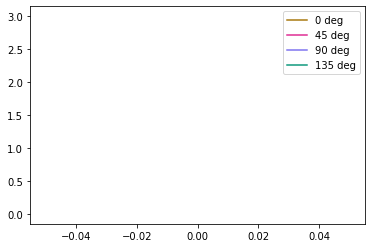

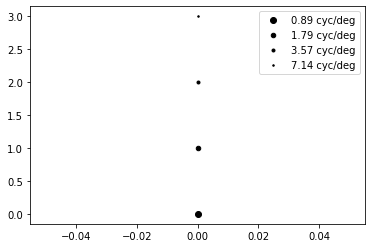

In [97]:
plt.figure();
for oo in range(n_ori):
    plt.plot(0,oo,color=colors[oo,:])    
plt.legend(['%d deg'%ori_unique[oo] for oo in range(n_ori)])

plt.figure();
for sf in range(n_sf):
    plt.plot(0,sf,'.',markersize=sizes[sf],color='k')    
plt.legend(['%.2f cyc/deg'%sf_unique[sf] for sf in range(n_sf)])

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


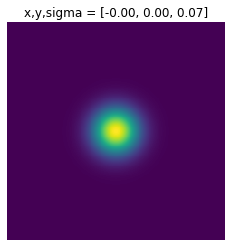

In [98]:
# To build more intuition going to load a few images and plot those that have highest activation for 
# a given feature type. Can get an idea of what image components these features relate to. 

from utils import prf_utils
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)
mm = 400

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

In [99]:
# load a set of features

from feature_extraction import fwrf_features
ims2use = np.arange(0,1000)
features_in_prf, defin = feat_loader.load(ims2use,mm)
features_in_prf.shape

Loading pre-computed features for models [400 - 400] from /user_data/mmhender/features/pyramid_texture/S1_features_each_prf_4ori_4sf_grid5.h5py
Took 102.99377 seconds to load file
Loading pre-computed magnitude_feature_autocorrs features for models [400 - 400] from /user_data/mmhender/features/pyramid_texture/PCA/S1_4ori_4sf_PCA_magnitude_feature_autocorrs_only_grid5.h5py
Took 0.17897 seconds to load file
start ind: 0
Loading pre-computed lowpass_recon_autocorrs features for models [400 - 400] from /user_data/mmhender/features/pyramid_texture/PCA/S1_4ori_4sf_PCA_lowpass_recon_autocorrs_only_grid5.h5py
Took 0.07341 seconds to load file
start ind: 272
Loading pre-computed highpass_resid_autocorrs features for models [400 - 400] from /user_data/mmhender/features/pyramid_texture/PCA/S1_4ori_4sf_PCA_highpass_resid_autocorrs_only_grid5.h5py
Took 0.18594 seconds to load file
start ind: 345
Loading pre-computed magnitude_within_scale_crosscorrs features for models [400 - 400] from /user_data/m

(1000, 97)

In [100]:
features_in_prf_full = np.zeros((features_in_prf.shape[0], len(defin)))
features_in_prf_full[:,defin] = features_in_prf

In [101]:
image_data = nsd_utils.get_image_data(subject)
image_data = image_data[ims2use,:,:,:]
image_data = nsd_utils.image_uncolorize_fn(image_data)

image_data.shape


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


(1000, 1, 240, 240)

In [14]:
labels_folder = os.path.join(default_paths.stim_labels_root, \
                     'S%d_within_prf_grid%d'%(subject,which_prf_grid))
labels_fn = os.path.join(default_paths.stim_labels_root,'S%d_within_prf_grid%d'%(subject, which_prf_grid), \
                 'S%d_concat_prf%d.csv'%(subject, mm))
print('loading from %s'%(labels_fn))
coco_df = pd.read_csv(labels_fn, index_col=0)


loading from /user_data/mmhender/nsd/labels/S1_within_prf_grid5/S1_concat_prf400.csv


In [15]:
dd = 0

labels = np.array(coco_df[discrim_type_list[dd]])[ims2use]
inds2use = ~np.isnan(labels)

labels.shape

(1000,)

19

90 deg, 1.786 cyc/deg


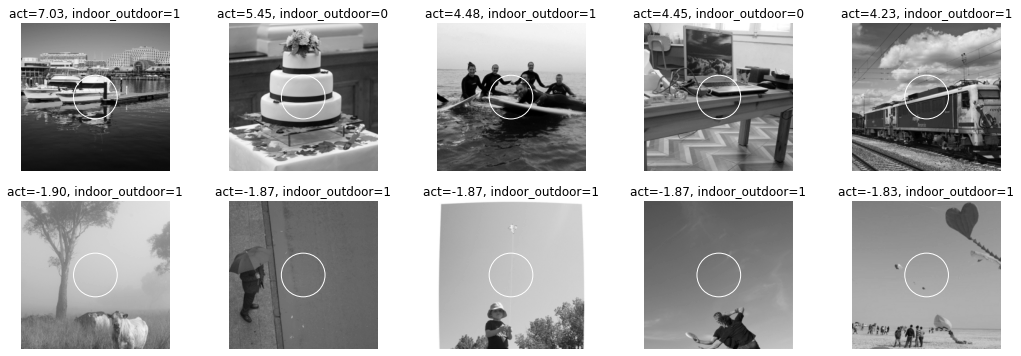

In [69]:
oo = 2;
sf = 1;
ff_withintype = np.where((orient_inds==oo) & (sf_inds==sf))[0][0]

fi=1
ff = np.where(feat_loader.feature_column_labels==fi)[0][ff_withintype]

print('%d deg, %.3f cyc/deg'%(ori_deg[ff_withintype], sf_cyc_per_deg[ff_withintype]))

zvals = scipy.stats.zscore(features_in_prf_full[:,ff])

top_n = 5
top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
bottom_image_inds = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_image_inds]
bottom_resp = zvals[bottom_image_inds]
top_images = image_data[top_image_inds,0,:,:]
bottom_images = image_data[bottom_image_inds,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:],cmap='gray',clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(top_resp[ii], discrim_type_list[dd], labels[top_image_inds[ii]]))
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:],cmap='gray',clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(bottom_resp[ii], discrim_type_list[dd], labels[bottom_image_inds[ii]]))


90 deg, 1.786 cyc/deg


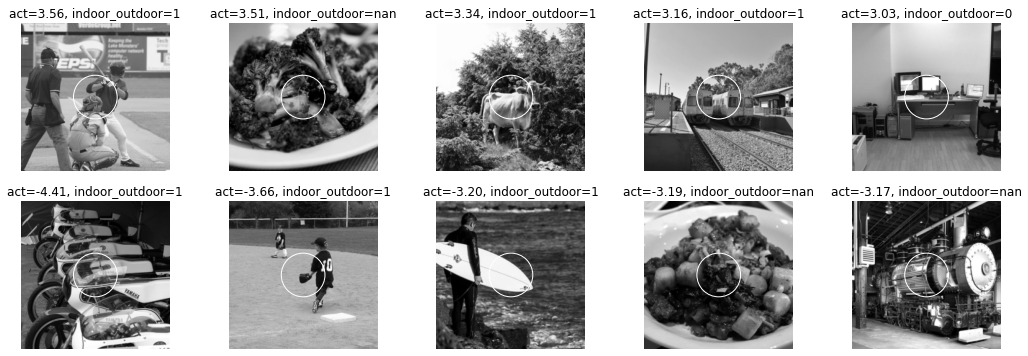

In [70]:
oo = 2;
sf = 1;
ff_withintype = np.where((orient_inds==oo) & (sf_inds==sf))[0][0]

fi=2
ff = np.where(feat_loader.feature_column_labels==fi)[0][ff_withintype]

print('%d deg, %.3f cyc/deg'%(ori_deg[ff_withintype], sf_cyc_per_deg[ff_withintype]))

zvals = scipy.stats.zscore(features_in_prf_full[:,ff])

top_n = 5
top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
bottom_image_inds = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_image_inds]
bottom_resp = zvals[bottom_image_inds]
top_images = image_data[top_image_inds,0,:,:]
bottom_images = image_data[bottom_image_inds,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:],cmap='gray',clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(top_resp[ii], discrim_type_list[dd], labels[top_image_inds[ii]]))
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:],cmap='gray',clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(bottom_resp[ii], discrim_type_list[dd], labels[bottom_image_inds[ii]]))


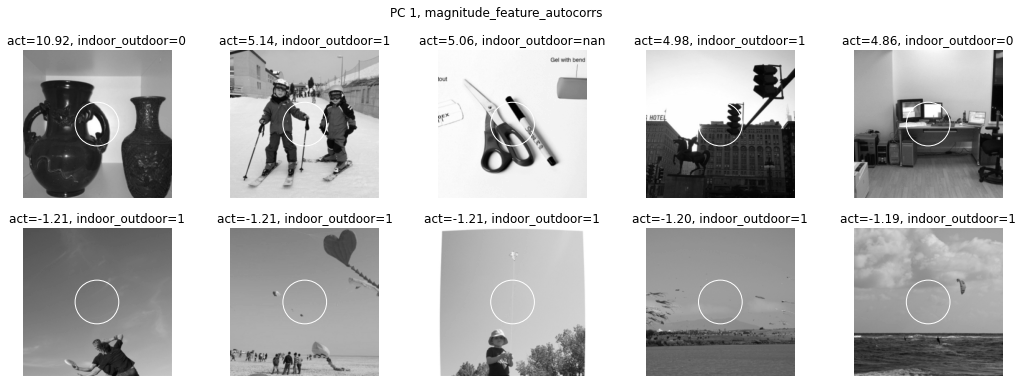

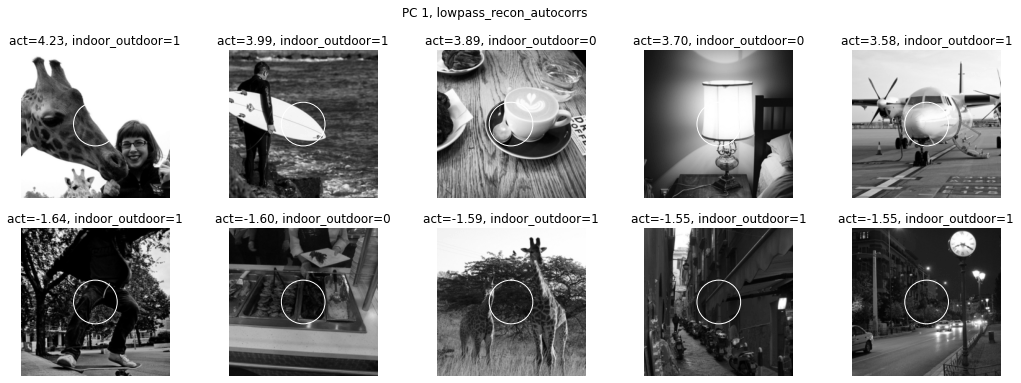

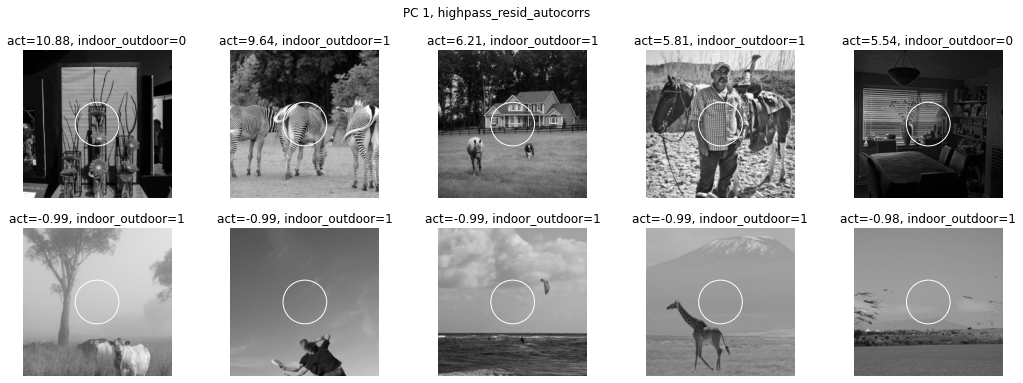

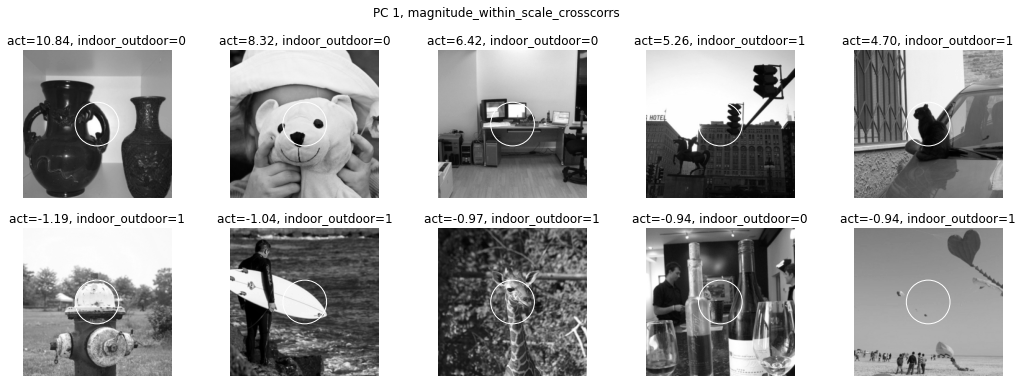

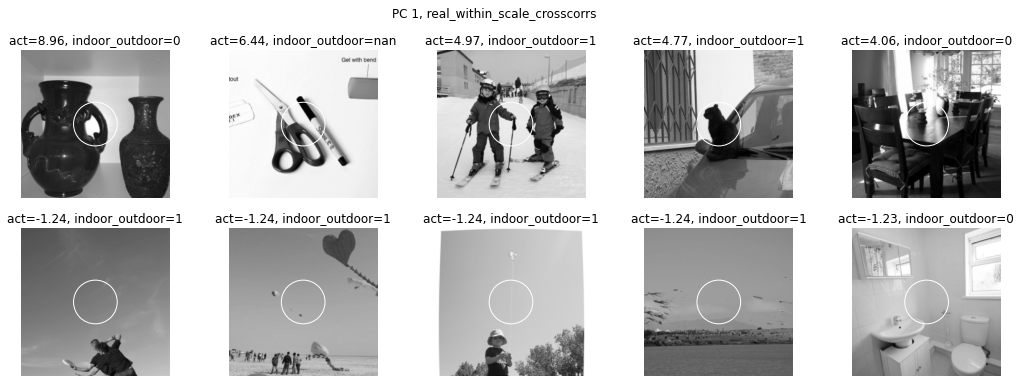

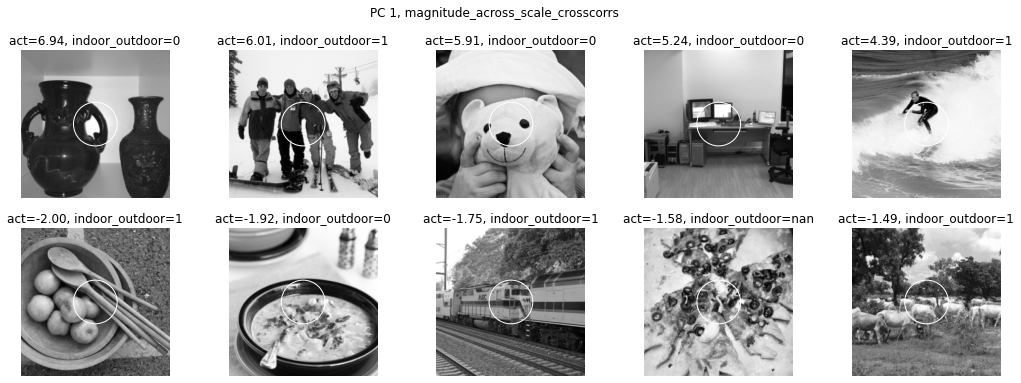

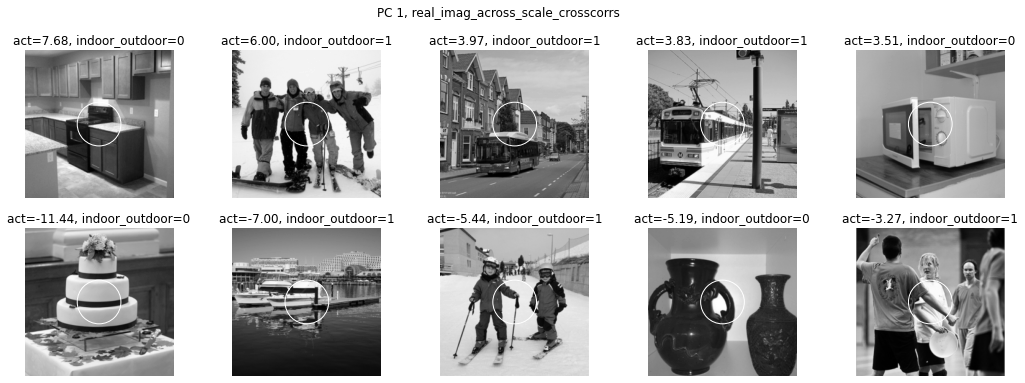

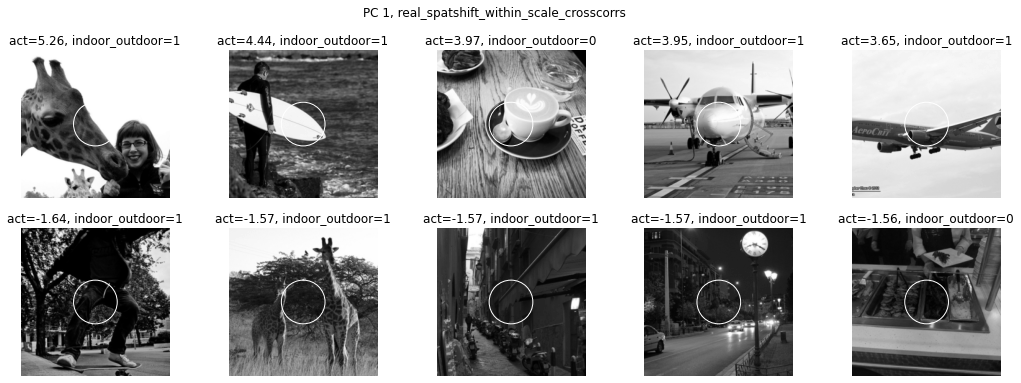

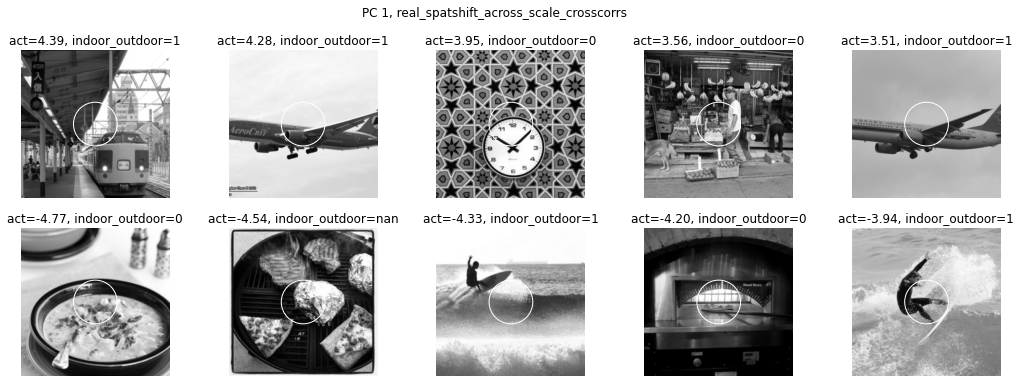

In [71]:

ff_withintype = 0

for fi in np.arange(5,14):

    ff = np.where(feat_loader.feature_column_labels==fi)[0][ff_withintype]
    
    zvals = scipy.stats.zscore(features_in_prf_full[:,ff])
   
    top_n = 5
    top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
    bottom_image_inds = np.argsort(zvals)[0:top_n]
    top_resp = zvals[top_image_inds]
    bottom_resp = zvals[bottom_image_inds]
    top_images = image_data[top_image_inds,0,:,:]
    bottom_images = image_data[bottom_image_inds,0,:,:]

    center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
    size_in_image = 2*sigma*n_pix

    plt.figure(figsize=(18,6));
    for ii in range(top_n):
        ax = plt.subplot(2,top_n,ii+1);
        plt.imshow(top_images[ii,:,:], cmap='gray',clim=[0,1])
        circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                     color = 'w', fill=False)
        ax.add_artist(circ)
        plt.axis('off')
        plt.title('act=%.2f, %s=%.0f'%(top_resp[ii], discrim_type_list[dd], labels[top_image_inds[ii]]))
    for ii in range(top_n):
        ax = plt.subplot(2,top_n,ii+1+top_n);    
        plt.imshow(bottom_images[ii,:,:],cmap='gray',clim=[0,1])
        circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                     color = 'w', fill=False)
        ax.add_artist(circ)
        plt.axis('off')
        plt.title('act=%.2f, %s=%.0f'%(bottom_resp[ii], discrim_type_list[dd], labels[bottom_image_inds[ii]]))
        
    plt.suptitle('PC %d, %s'%((ff_withintype+1), feature_types_all[fi]))

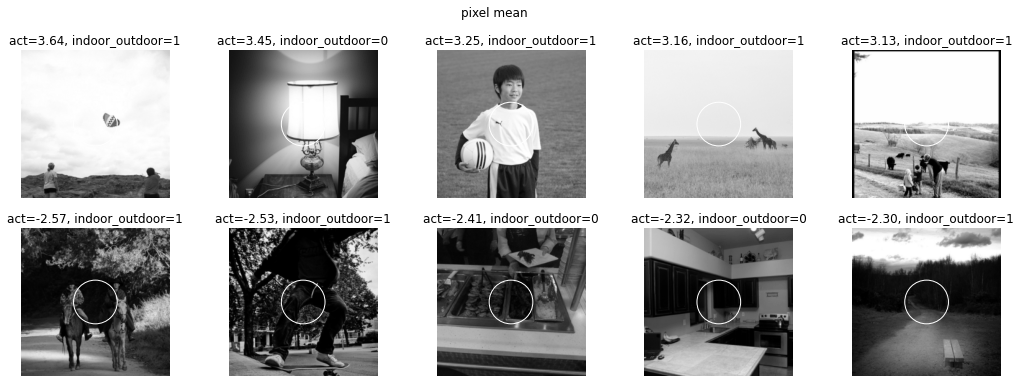

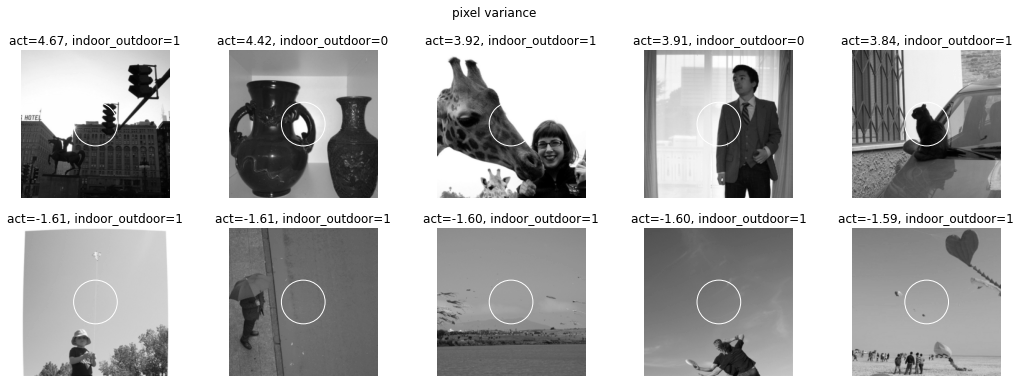

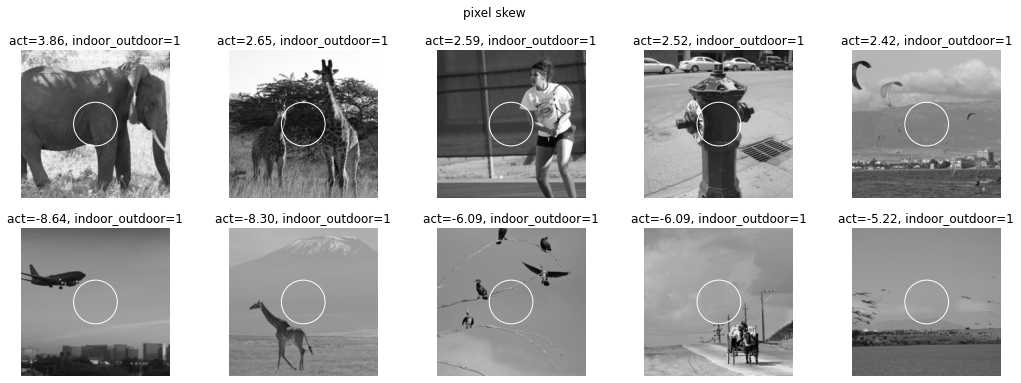

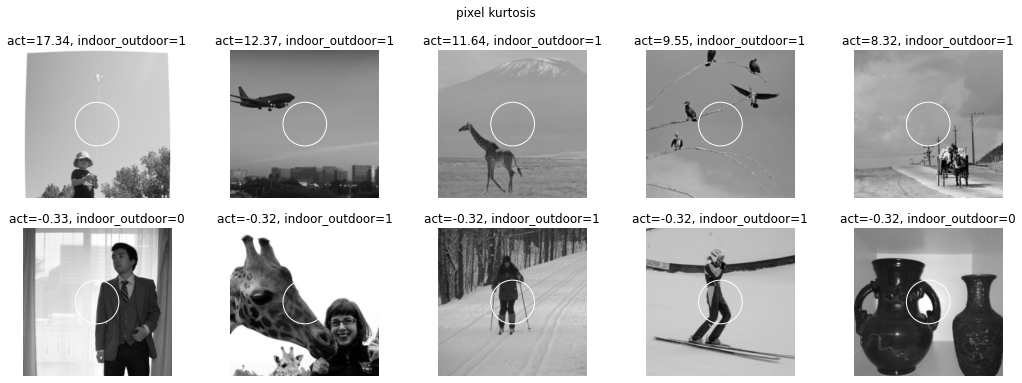

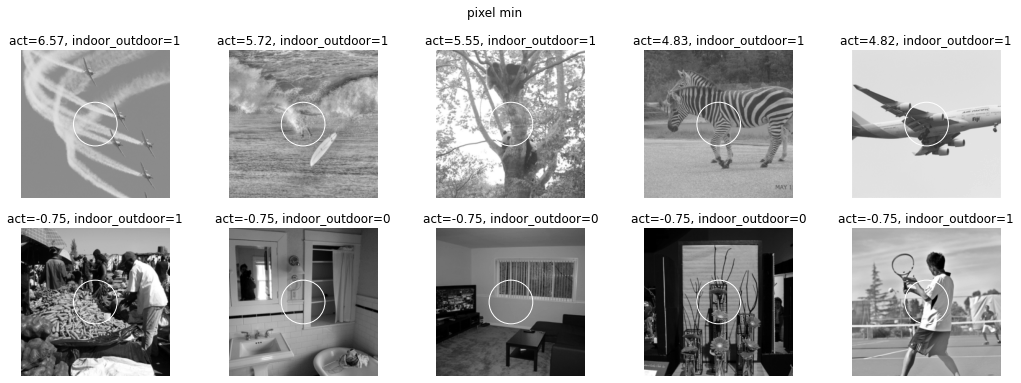

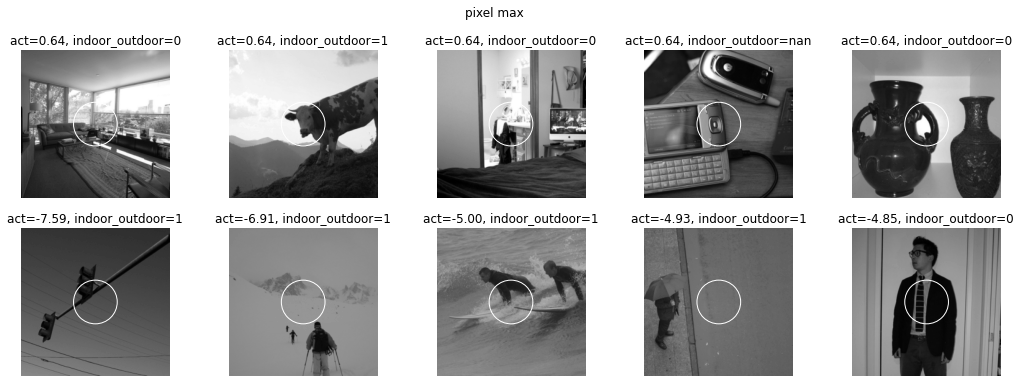

In [72]:

fi = 0
pixel_names = ['mean', 'variance', 'skew', 'kurtosis', 'min', 'max']

for ff_withintype in np.arange(6):
    
    ff = np.where(feat_loader.feature_column_labels==fi)[0][ff_withintype]
    
    zvals = scipy.stats.zscore(features_in_prf_full[:,ff])
   
    top_n = 5
    top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
    bottom_image_inds = np.argsort(zvals)[0:top_n]
    top_resp = zvals[top_image_inds]
    bottom_resp = zvals[bottom_image_inds]
    top_images = image_data[top_image_inds,0,:,:]
    bottom_images = image_data[bottom_image_inds,0,:,:]

    center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
    size_in_image = 2*sigma*n_pix

    plt.figure(figsize=(18,6));
    for ii in range(top_n):
        ax = plt.subplot(2,top_n,ii+1);
        plt.imshow(top_images[ii,:,:], cmap='gray',clim=[0,1])
        circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                     color = 'w', fill=False)
        ax.add_artist(circ)
        plt.axis('off')
        plt.title('act=%.2f, %s=%.0f'%(top_resp[ii], discrim_type_list[dd], labels[top_image_inds[ii]]))
    for ii in range(top_n):
        ax = plt.subplot(2,top_n,ii+1+top_n);    
        plt.imshow(bottom_images[ii,:,:],cmap='gray',clim=[0,1])
        circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                     color = 'w', fill=False)
        ax.add_artist(circ)
        plt.axis('off')
        plt.title('act=%.2f, %s=%.0f'%(bottom_resp[ii], discrim_type_list[dd], labels[bottom_image_inds[ii]]))
        
    plt.suptitle('pixel %s'%(pixel_names[ff_withintype]))

Text(0.5, 0.98, 'variance_highpass_resid')

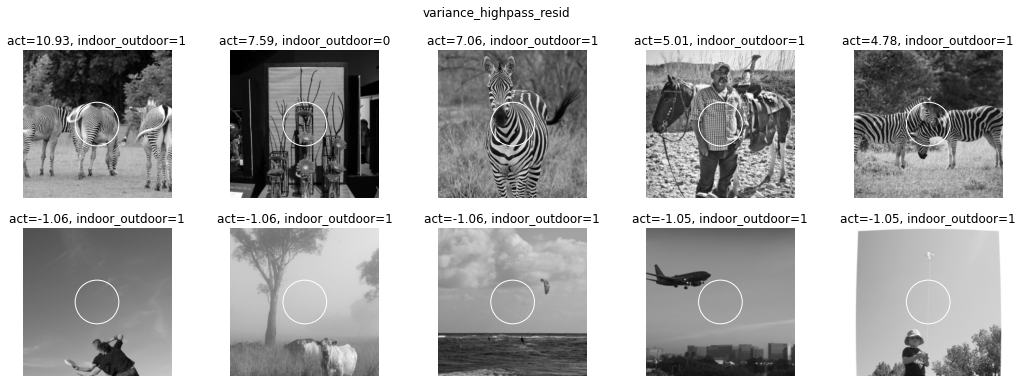

In [74]:

fi = 4
ff_withintype=0;

ff = np.where(feat_loader.feature_column_labels==fi)[0][ff_withintype]

zvals = scipy.stats.zscore(features_in_prf_full[:,ff])

top_n = 5
top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
bottom_image_inds = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_image_inds]
bottom_resp = zvals[bottom_image_inds]
top_images = image_data[top_image_inds,0,:,:]
bottom_images = image_data[bottom_image_inds,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:], cmap='gray',clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(top_resp[ii], discrim_type_list[dd], labels[top_image_inds[ii]]))
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:],cmap='gray',clim=[0,1])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f, %s=%.0f'%(bottom_resp[ii], discrim_type_list[dd], labels[bottom_image_inds[ii]]))

plt.suptitle('%s'%(feature_types_all[fi]))